# FBB I see you are making some progress. However this is of course not finished. 

# You read in the wrong gener file for hispanic females. 

# Other than that the first plot is good, but there are no fits. Could you not do the fits with statsmodels?

# FBB In general, you should remove my instruction cells: this should be your notebook, with your description of the exercise as a header, and your code and description of the code, and plots, and explaining why you do what you do. 

# you MUST label, give titles, and decribe with captions ALL OF your figures to show that you are understanding what you are doing, and to allow the reader to understand the notebook without having to read the code (and to allow me to se that you understand the scientific inference). The notebook is a "presentation".

# you have not finished, of course, so I can only comment on the first few steps

# look for more comments int he cells containing FBB

In [78]:

import sys
import os
import numpy as np
import pylab as pl
%pylab inline
import pandas as pd
import statsmodels.api as sm
import json
import os
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


have all celled filled in as indicated

properly organize the data

plot the scatter matrix

plot the data (female vs male income) as directed

do and plot a linear regression to the data, only Total Median Income and median income by category

compare the linear regressions

have predictions at the end of a salaty for a female, given the corresponding male salary

In [79]:
#Url where the data is stored online
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [80]:
#Create an array for all males
allmales = {}

In [81]:
# Scrape data through pandas read excel function, get only the necessary rows bc the sheets re messy
allmales ['all'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls", header=9, skiprows=(0-9))
allmales['white'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_4.xls", header=9, skiprows=(0-9))
allmales['black'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_6.xls", header=9, skiprows=(0-9))
allmales['asian'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_8.xls", header=9, skiprows=(0-9))
allmales['hispanic'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_9.xls", header=9, skiprows=(0-9))

In [82]:

allfemales = {}

In [83]:
allfemales['all'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_1.xls", header=9, skiprows=(0-9))
allfemales['white'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_4.xls", header=9, skiprows=(0-9))
allfemales['black'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_6.xls", header=9, skiprows=(0-9))
allfemales['asian'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_8.xls", header=9, skiprows=(0-9))
allfemales['hispanic'] = pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_9.xls", header=9, skiprows=(0-9))

# FBB you read in the male hispanic where you should hav read the female hispanic.
# You should have spotted the difference since I was giving you a plot to compare with!

In [84]:
#the rel values in the Median income row are fewer than the number of rows
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [86]:
#Not sure what this is doing?
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Re-create pandas scatter plot with 'Total with Income','$2,500 to $4,999','Median income','Gini ratio'

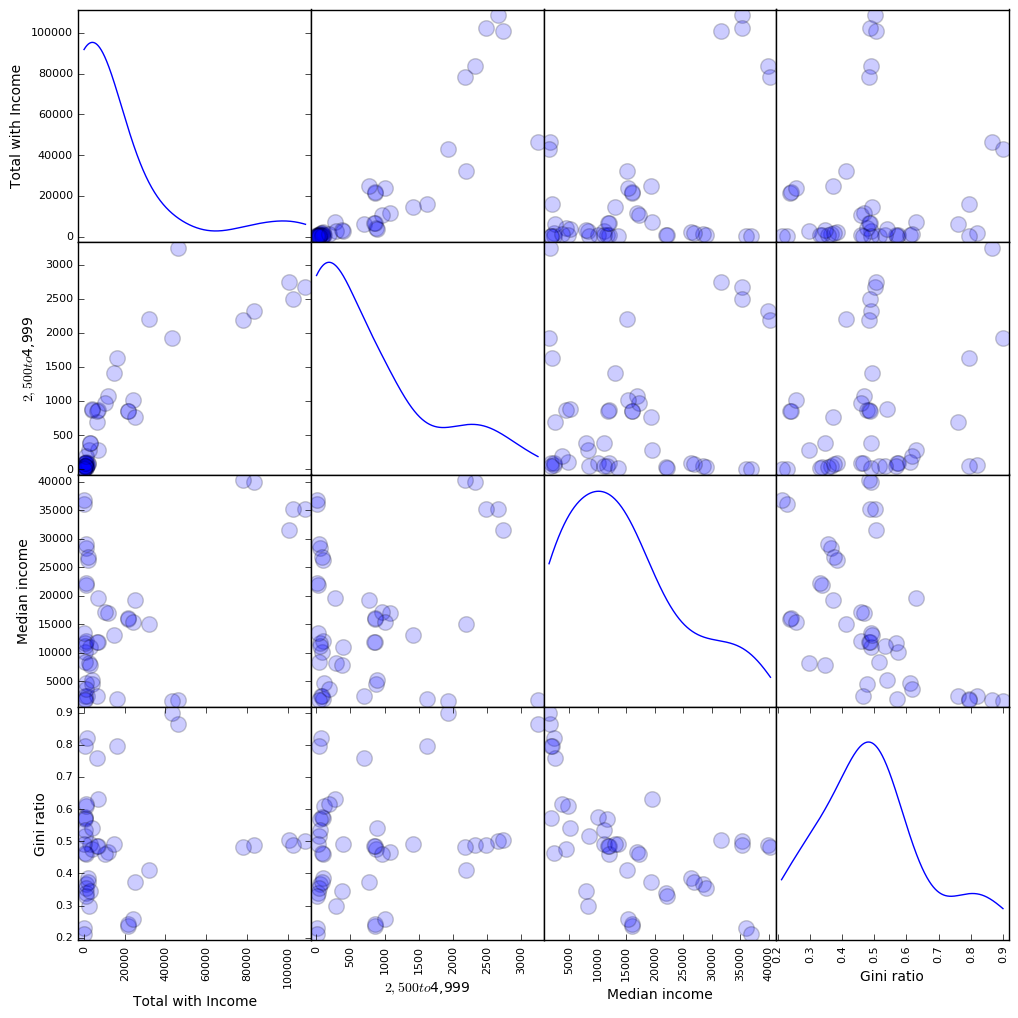

In [89]:
pd.scatter_matrix(allmales['all']
                   [['Total with Income','$2,500 to $4,999','Median income','Gini ratio']], alpha=0.2,
                   linewidth= 1, s=500, figsize=(12,12), diagonal='kde')       

3. For women 


# FBB write complete sentences in your captions


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74d09e0fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f74d0e179d0>]], dtype=object)

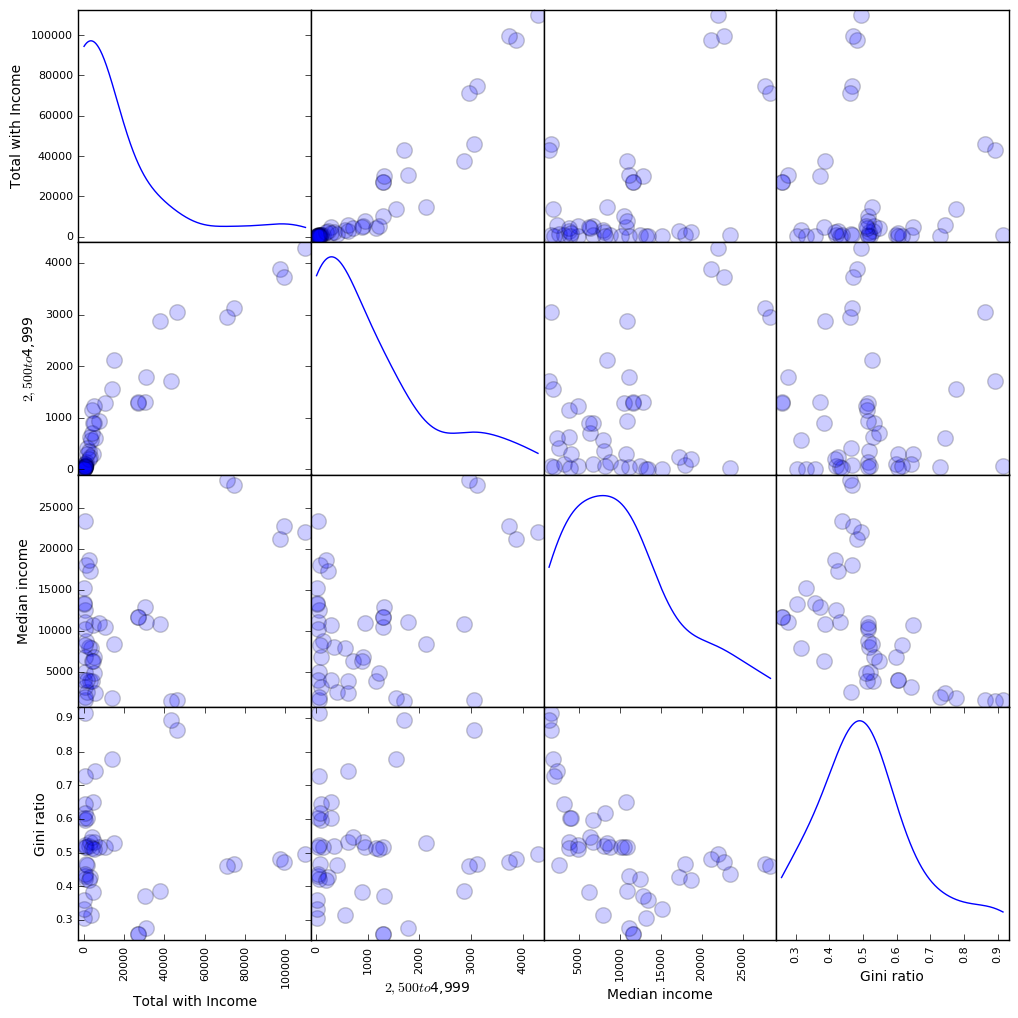

In [90]:
pd.scatter_matrix(allfemales['all']
                   [['Total with Income','$2,500 to $4,999','Median income','Gini ratio']], alpha=0.2,
                   linewidth= 1, s=500, figsize=(12,12), diagonal='kde')

# FBB missing caption

In [52]:
def line (list1, list2):
    #this would be a function that creates a line given parameters, 
    #like we did in class
    p0 = [0,1]
    result = minimize(residuals(), p0, args=(allmales, allfemales))
    return result

def residuals(data, model, error=None):
    #you can add errors if you want
    #you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

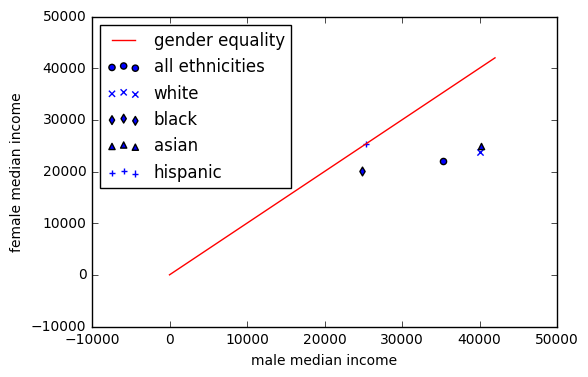

In [91]:
##plotting the Total median incame by race


pl.figure() 
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1], marker='o', label = 'all ethnicities')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], marker='x', label = 'white')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], marker='d', label = 'black')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], marker='^', label = 'asian')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], marker='+', label = 'hispanic')
pl.plot([0,42000], [0,42000], 'r-', label= 'gender equality')
pl.xlabel('male median income')
pl.ylabel('female median income')
pl.legend(loc = 2)

In [ ]:
# FBB missing caption

# you read in the wrong data for hispanic